## John Ly (jtl222) &nbsp;&nbsp;&nbsp; Google Play Store Apps

Data Visualization of [Google Play Store Apps](https://www.kaggle.com/gauthamp10/google-playstore-apps/) from April 2019<br>
&nbsp;&nbsp; - &nbsp;(Data collected by Gautham Prakash and Jithin Kohshy)

The goal of this project is to determine if there is any correlation between total number of downloads and app category from a set of 32k apps published to the Google Play Store.

In [25]:
# Useful Python Libraries for Data Visualization

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

import seaborn as sns

In [26]:
# https://matplotlib.org/tutorials/introductory/customizing.html
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [27]:
# initializing csv file as a dataframe
app_data = pd.read_csv('Google-Playstore-32K.csv')
# removing columns with extraneous information
# app_data = app_data.drop(["Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14"], axis=1)
app_data.head(5)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


### 1. Google Play Store Categories by Number of Apps

In [139]:
# determine the types of Categories that exist in the Play Store and frequency of each one
# place into two column dataframe for easier manipulation
# https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
app_categories = app_data['Category'].value_counts().rename_axis('Category').reset_index(name='Count')
app_categories

,Category,Count
0,EDUCATION,3431
1,TOOLS,2399
2,ENTERTAINMENT,2085
3,BOOKS_AND_REFERENCE,1639
4,LIFESTYLE,1368
5,FINANCE,1367
6,MUSIC_AND_AUDIO,1343
7,PRODUCTIVITY,1113
8,BUSINESS,1030
9,GAME_PUZZLE,1006


In [140]:
# Combining all gaming categories
game_count = 0
for i in range(0, len(app_categories)):
    if ('GAME' in app_categories['Category'][i]):
        game_count += app_categories['Count'][i]
        print(app_categories['Category'][i], app_categories['Count'][i])
        app_categories = app_categories.drop([i])
game_count

GAME_PUZZLE 1006
GAME_CASUAL 708
GAME_ARCADE 671
GAME_ACTION 573
GAME_SIMULATION 517
GAME_CARD 497
GAME_EDUCATIONAL 493
GAME_ROLE_PLAYING 421
GAME_STRATEGY 362
GAME_RACING 319
GAME_ADVENTURE 316
GAME_SPORTS 305
GAME_WORD 272
GAME_BOARD 271
GAME_CASINO 158
GAME_TRIVIA 145
GAME_MUSIC 97


7131

In [141]:
app_categories=app_categories.append({'Category':'GAMING', 'Count':game_count}, ignore_index=True)
app_categories

,Category,Count
0,EDUCATION,3431
1,TOOLS,2399
2,ENTERTAINMENT,2085
3,BOOKS_AND_REFERENCE,1639
4,LIFESTYLE,1368
5,FINANCE,1367
6,MUSIC_AND_AUDIO,1343
7,PRODUCTIVITY,1113
8,BUSINESS,1030
9,PERSONALIZATION,839


In [142]:
# # Combining Dating with Social
# print(app_categories['Count'][17])
# app_categories['Count'][17] += app_categories['Count'][31]
# app_categories = app_categories.drop([31])
# print(app_categories['Count'][17])
# app_categories = app_categories.sort_values(by=['Count'],ascending=False).reset_index(drop=True)
# app_categories

In [143]:
# # filter out outlier categories
# main_categories = main_categories[main_categories['Count'].between(2, 270000)]
# # re-sort and reset index for dataframe
# main_categories = main_categories.sort_values(by=['Count'],ascending=False).reset_index(drop=True)
# main_categories

In [144]:
# Combine Smaller Categories
AppCat_Orig = app_categories.copy()
others_count = 0
for i in range(0, len(app_categories)):
    if (app_categories['Count'][i]<350):
        others_count += app_categories['Count'][i]
        print(app_categories['Category'][i], app_categories['Count'][i])
        app_categories = app_categories.drop([i])

# Add "Others" category to encompass the remaining apps
app_categories = app_categories.sort_values(by=['Count'],ascending=False).reset_index(drop=True)
app_categories = app_categories.append({'Category':'Others', 'Count':others_count}, ignore_index=True)
app_categories

VIDEO_PLAYERS 330
AUTO_AND_VEHICLES 222
WEATHER 200
ART_AND_DESIGN 163
HOUSE_AND_HOME 128
PARENTING 109
DATING 103
EVENTS 93
BEAUTY 90
COMICS 81
LIBRARIES_AND_DEMO 64
 Channel 2 News 1
) 1
 Podcasts 1


,Category,Count
0,GAMING,7131
1,EDUCATION,3431
2,TOOLS,2399
3,ENTERTAINMENT,2085
4,BOOKS_AND_REFERENCE,1639
5,LIFESTYLE,1368
6,FINANCE,1367
7,MUSIC_AND_AUDIO,1343
8,PRODUCTIVITY,1113
9,BUSINESS,1030


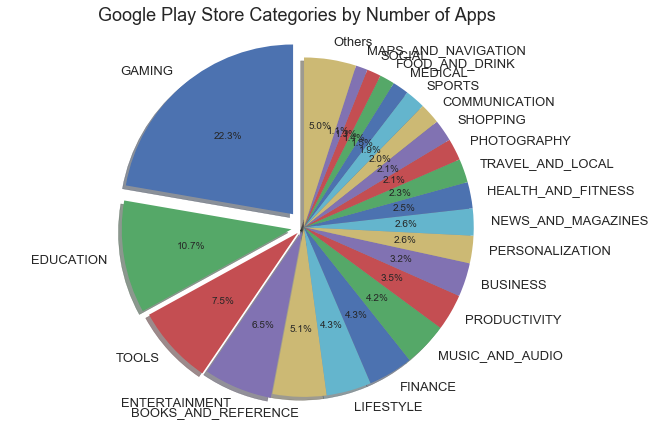

In [145]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode1 = np.zeros(23)
explode1[0] = 0.1
explode1[1] = 0.075
explode1[2] = 0.05
explode1[3] = 0.025

# only "explode" the first four slices (e.g. 'GAMING' = 1st slice)

fig1, ax1 = plt.subplots()
ax1.pie(app_categories['Count'], explode = explode1, labels=app_categories['Category'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Google Play Store Categories by Number of Apps', fontsize=18)

plt.show()

After sorting 32K apps from the Google Play Store, we can now see that the most abundant app category on the play store is about Gaming followed by Education related apps and then Tools.

### 2. Google Play Store Categories by Number of Downloads

In [35]:
download_data = app_data.copy()
download_data.head(3)    

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0


In [36]:
# make values in 'Installs' usable for integer manipulation as opposed to strings
for x in range(0,len(download_data)):
    try: 
        download_data['Installs'][x] = download_data['Installs'][x].replace(',','').replace('+','')
    except ValueError:
        print(x)
download_data.head(3)    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,5000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,100000000,Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,100000,1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0


In [37]:
# Create a new dictionary containing Categories as Keys
categories = download_data['Category'].unique()
dictOfCategories = dict.fromkeys(categories, 0)
dictOfCategories

{' Channel 2 News': 0,
 ' Podcasts': 0,
 ')': 0,
 'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 0,
 'BEAUTY': 0,
 'BOOKS_AND_REFERENCE': 0,
 'BUSINESS': 0,
 'COMICS': 0,
 'COMMUNICATION': 0,
 'DATING': 0,
 'EDUCATION': 0,
 'ENTERTAINMENT': 0,
 'EVENTS': 0,
 'FINANCE': 0,
 'FOOD_AND_DRINK': 0,
 'GAME_ACTION': 0,
 'GAME_ADVENTURE': 0,
 'GAME_ARCADE': 0,
 'GAME_BOARD': 0,
 'GAME_CARD': 0,
 'GAME_CASINO': 0,
 'GAME_CASUAL': 0,
 'GAME_EDUCATIONAL': 0,
 'GAME_MUSIC': 0,
 'GAME_PUZZLE': 0,
 'GAME_RACING': 0,
 'GAME_ROLE_PLAYING': 0,
 'GAME_SIMULATION': 0,
 'GAME_SPORTS': 0,
 'GAME_STRATEGY': 0,
 'GAME_TRIVIA': 0,
 'GAME_WORD': 0,
 'HEALTH_AND_FITNESS': 0,
 'HOUSE_AND_HOME': 0,
 'LIBRARIES_AND_DEMO': 0,
 'LIFESTYLE': 0,
 'MAPS_AND_NAVIGATION': 0,
 'MEDICAL': 0,
 'MUSIC_AND_AUDIO': 0,
 'NEWS_AND_MAGAZINES': 0,
 'PARENTING': 0,
 'PERSONALIZATION': 0,
 'PHOTOGRAPHY': 0,
 'PRODUCTIVITY': 0,
 'SHOPPING': 0,
 'SOCIAL': 0,
 'SPORTS': 0,
 'TOOLS': 0,
 'TRAVEL_AND_LOCAL': 0,
 'VIDEO_PLAYERS': 0,
 'WEATHER

In [39]:
# Total up total downloads in each category
for x in range(0,len(download_data)):
    if download_data['Category'][x] in dictOfCategories:
        try:
            dictOfCategories[download_data['Category'][x]] += int(download_data['Installs'][x])
        except ValueError:
            print(x)
dictOfCategories

6941


{' Channel 2 News': 11976,
 ' Podcasts': 0,
 ')': 6,
 'ART_AND_DESIGN': 344961050,
 'AUTO_AND_VEHICLES': 255786710,
 'BEAUTY': 84192320,
 'BOOKS_AND_REFERENCE': 1782462437,
 'BUSINESS': 1815951203,
 'COMICS': 152448520,
 'COMMUNICATION': 23803976342,
 'DATING': 198057050,
 'EDUCATION': 1562335325,
 'ENTERTAINMENT': 6703089031,
 'EVENTS': 47067285,
 'FINANCE': 1986189901,
 'FOOD_AND_DRINK': 752883976,
 'GAME_ACTION': 8272333440,
 'GAME_ADVENTURE': 1468670161,
 'GAME_ARCADE': 10344473316,
 'GAME_BOARD': 1429776050,
 'GAME_CARD': 1125802910,
 'GAME_CASINO': 859263000,
 'GAME_CASUAL': 9189514835,
 'GAME_EDUCATIONAL': 1371778027,
 'GAME_MUSIC': 807692500,
 'GAME_PUZZLE': 4941723285,
 'GAME_RACING': 6428087020,
 'GAME_ROLE_PLAYING': 1341847300,
 'GAME_SIMULATION': 3313670910,
 'GAME_SPORTS': 3377522900,
 'GAME_STRATEGY': 3609776700,
 'GAME_TRIVIA': 597079106,
 'GAME_WORD': 1261310012,
 'HEALTH_AND_FITNESS': 2268075860,
 'HOUSE_AND_HOME': 332256550,
 'LIBRARIES_AND_DEMO': 77593650,
 'LIFESTYL

In [126]:
# Convert dictOfCategories into DataFrame
DFCategories = pd.DataFrame(list(dictOfCategories.items()),columns=['Category','Downloads']).sort_values(by=['Downloads'],ascending=False).reset_index(drop=True)
DFCategories

,Category,Downloads
0,TOOLS,29950303251
1,COMMUNICATION,23803976342
2,PRODUCTIVITY,20079705710
3,VIDEO_PLAYERS,15371072310
4,TRAVEL_AND_LOCAL,14247364915
5,SOCIAL,10984164470
6,GAME_ARCADE,10344473316
7,PHOTOGRAPHY,9266837042
8,GAME_CASUAL,9189514835
9,GAME_ACTION,8272333440


In [127]:
# Combining all gaming categories
game_dl = 0
for i in range(0, len(DFCategories)):
    if ('GAME' in DFCategories['Category'][i]):
        game_dl += DFCategories['Downloads'][i]
        print(DFCategories['Category'][i], DFCategories['Downloads'][i])
        DFCategories = DFCategories.drop([i])
DFCategories=DFCategories.append({'Category':'GAMING', 'Downloads':game_dl}, ignore_index=True)
DFCategories

GAME_ARCADE 10344473316
GAME_CASUAL 9189514835
GAME_ACTION 8272333440
GAME_RACING 6428087020
GAME_PUZZLE 4941723285
GAME_STRATEGY 3609776700
GAME_SPORTS 3377522900
GAME_SIMULATION 3313670910
GAME_ADVENTURE 1468670161
GAME_BOARD 1429776050
GAME_EDUCATIONAL 1371778027
GAME_ROLE_PLAYING 1341847300
GAME_WORD 1261310012
GAME_CARD 1125802910
GAME_CASINO 859263000
GAME_MUSIC 807692500
GAME_TRIVIA 597079106


,Category,Downloads
0,TOOLS,29950303251
1,COMMUNICATION,23803976342
2,PRODUCTIVITY,20079705710
3,VIDEO_PLAYERS,15371072310
4,TRAVEL_AND_LOCAL,14247364915
5,SOCIAL,10984164470
6,PHOTOGRAPHY,9266837042
7,MUSIC_AND_AUDIO,7204844711
8,ENTERTAINMENT,6703089031
9,NEWS_AND_MAGAZINES,5492072670


In [128]:
# Combine Smaller Categories
DFCat_Orig = DFCategories.copy()
others_dl = 0
for i in range(0, len(DFCategories)):
    if (DFCategories['Downloads'][i]<3000000000):
        others_dl += DFCategories['Downloads'][i]
        print(DFCategories['Category'][i], DFCategories['Downloads'][i])
        DFCategories = DFCategories.drop([i])

# Add "Others" category to encompass the remaining apps
DFCategories = DFCategories.sort_values(by=['Downloads'],ascending=False).reset_index(drop=True)
DFCategories = DFCategories.append({'Category':'Others', 'Downloads':others_dl}, ignore_index=True)
DFCategories

HEALTH_AND_FITNESS 2268075860
FINANCE 1986189901
BUSINESS 1815951203
BOOKS_AND_REFERENCE 1782462437
EDUCATION 1562335325
LIFESTYLE 1541666080
MAPS_AND_NAVIGATION 1127518750
WEATHER 972703200
SPORTS 865030610
FOOD_AND_DRINK 752883976
ART_AND_DESIGN 344961050
HOUSE_AND_HOME 332256550
AUTO_AND_VEHICLES 255786710
DATING 198057050
COMICS 152448520
MEDICAL 107520310
BEAUTY 84192320
LIBRARIES_AND_DEMO 77593650
PARENTING 53158000
EVENTS 47067285
 Channel 2 News 11976
) 6
 Podcasts 0


,Category,Downloads
0,GAMING,59740321472
1,TOOLS,29950303251
2,COMMUNICATION,23803976342
3,PRODUCTIVITY,20079705710
4,VIDEO_PLAYERS,15371072310
5,TRAVEL_AND_LOCAL,14247364915
6,SOCIAL,10984164470
7,PHOTOGRAPHY,9266837042
8,MUSIC_AND_AUDIO,7204844711
9,ENTERTAINMENT,6703089031


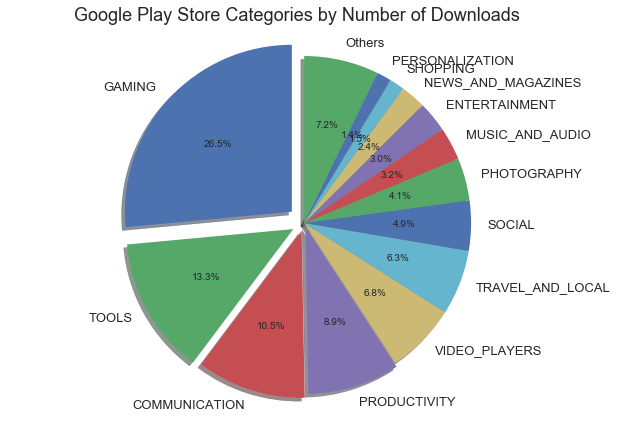

In [129]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode2 = np.zeros(14)
explode2[0] = 0.1
explode2[1] = 0.075
explode2[2] = 0.05
explode2[3] = 0.025

# only "explode" the first four slices 

fig2, ax2 = plt.subplots()
ax2.pie(DFCategories['Downloads'], explode = explode2, labels=DFCategories['Category'], autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Google Play Store Categories by Number of Downloads', fontsize=18)

plt.show()

Here are some quite surprising results. Comparing our pie charts from Section 1 and 2, we still see <strong>Gaming</strong> as the leader in terms of app quantity and demand. But rather than having 2nd place being filled by <strong>Education</strong>, <strong>Tools</strong> actually takes the number 2 spot as having the most downloads. As a matter of fact, the <strong>Education</strong> category which showed up plentifully as having the second most amount of apps in a category turns out to not have nearly as many total downloads, ranking in at 17th place.

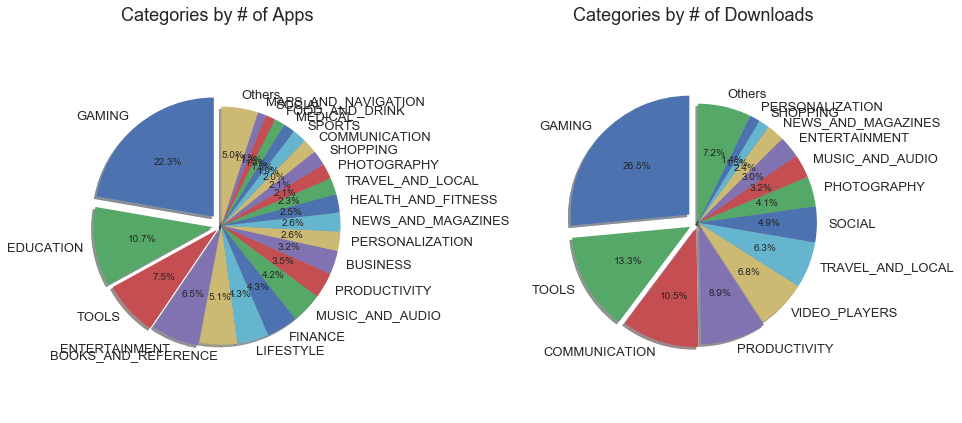

In [130]:
plt.subplot(121)
plt.pie(app_categories['Count'], explode = explode1, labels=app_categories['Category'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Categories by # of Apps', fontsize=18)



plt.subplot(122)
plt.pie(DFCategories['Downloads'], explode = explode2, labels=DFCategories['Category'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Categories by # of Downloads', fontsize=18)

plt.subplots_adjust(right=.9999)

plt.subplots_adjust(left=.0001)

plt.subplots_adjust(wspace=.75)


plt.show()

In [159]:
AppCat_Orig = AppCat_Orig.sort_values(by=['Category'],ascending=True).reset_index(drop=True)
DFCat_Orig = DFCat_Orig.sort_values(by=['Category'],ascending=True).reset_index(drop=True)

In [155]:
ComboCats = pd.merge(AppCat_Orig, DFCat_Orig, on='Category')
ComboCats

,Category,Count,Downloads
0,Channel 2 News,1,11976
1,Podcasts,1,0
2,),1,6
3,ART_AND_DESIGN,163,344961050
4,AUTO_AND_VEHICLES,222,255786710
5,BEAUTY,90,84192320
6,BOOKS_AND_REFERENCE,1639,1782462437
7,BUSINESS,1030,1815951203
8,COMICS,81,152448520
9,COMMUNICATION,637,23803976342


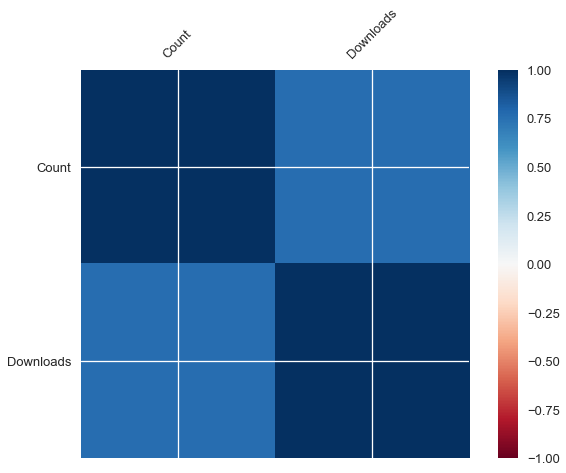

In [162]:
corr = ComboCats.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

Here we can see an strong relationship of about 0.76 between the number of downloads in an app category and the number of apps i that category available to download. 

(0.61960784313725492, 0.0039215686274509803, 0.25882352941176473, 1.0)
(0.68918406072106264, 0.081087919038583173, 0.27526881720430108, 1.0)
(0.75876027830487036, 0.15825426944971538, 0.29171410499683748, 1.0)
(0.82833649588867808, 0.2354206198608475, 0.30815939278937382, 1.0)
(0.87058823529411766, 0.29664769133459834, 0.29614168247944339, 1.0)
(0.90980392156862744, 0.35610373181530675, 0.28096141682479447, 1.0)
(0.94901960784313732, 0.41555977229601515, 0.2657811511701455, 1.0)
(0.96597090449082867, 0.49323213156230228, 0.29310562934851359, 1.0)
(0.97735610373181536, 0.57545857052498417, 0.33105629348513599, 1.0)
(0.98874130297280205, 0.65768500948766584, 0.36900695762175828, 1.0)
(0.99304237824161923, 0.72662871600252998, 0.417583807716635, 1.0)
(0.99430740037950671, 0.78987982289690062, 0.47071473750790632, 1.0)
(0.99557242251739408, 0.85313092979127125, 0.5238456672991777, 1.0)
(0.99683744465528146, 0.90196078431372539, 0.58456672991777336, 1.0)
(0.99810246679316894, 0.941176470588

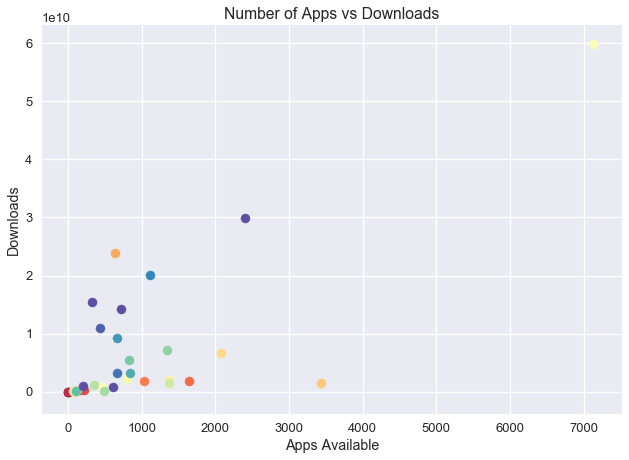

In [198]:
colors = plt.cm.get_cmap('Spectral', 32)


for cat in range(0,len(ComboCats)):
    plt.scatter(ComboCats['Count'][cat],ComboCats['Downloads'][cat], c = colors(cat), label = ComboCats['Category'][cat])
    print(colors(cat))


# plt.scatter(ComboCats['Count'],ComboCats['Downloads'],c=ComboCats['Category'].ravel(), cmap=plt.cm.Paired) #Colored by category

plt.title('Number of Apps vs Downloads')
plt.xlabel('Apps Available')
plt.ylabel('Downloads')

plt.show()

Here we can see that there is a weak correlation between an abundance of apps in one category and the amount of demand for those apps in terms of number of downloads.